# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [22]:
import pandas as pd

df = pd.read_csv('churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [23]:
from pycaret.classification import ClassificationExperiment

In [24]:
automl = ClassificationExperiment() 

In [25]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,2541
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Ordinal features,1
9,Numeric features,3


In [26]:
automl

In [27]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7897,0.8344,0.7897,0.7795,0.7813,0.4229,0.4285,0.5360
gbc,Gradient Boosting Classifier,0.7880,0.8350,0.7880,0.7769,0.7786,0.4145,0.4210,0.6460
lr,Logistic Regression,0.7878,0.8332,0.7878,0.7797,0.7808,0.4246,0.4297,2.3030
lda,Linear Discriminant Analysis,0.7840,0.8218,0.7840,0.7747,0.7768,0.4133,0.4177,0.1820
ridge,Ridge Classifier,0.7838,0.0000,0.7838,0.7691,0.7691,0.3829,0.3950,0.2970
lightgbm,Light Gradient Boosting Machine,0.7755,0.8246,0.7755,0.7660,0.7691,0.3944,0.3970,0.7420
rf,Random Forest Classifier,0.7570,0.7923,0.7570,0.7450,0.7489,0.3396,0.3427,0.7670
knn,K Neighbors Classifier,0.7552,0.7416,0.7552,0.7413,0.7454,0.3278,0.3321,0.3530
et,Extra Trees Classifier,0.7507,0.7661,0.7507,0.7417,0.7450,0.3338,0.3356,0.6270
dummy,Dummy Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.3300


In [28]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=2541)

In [40]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

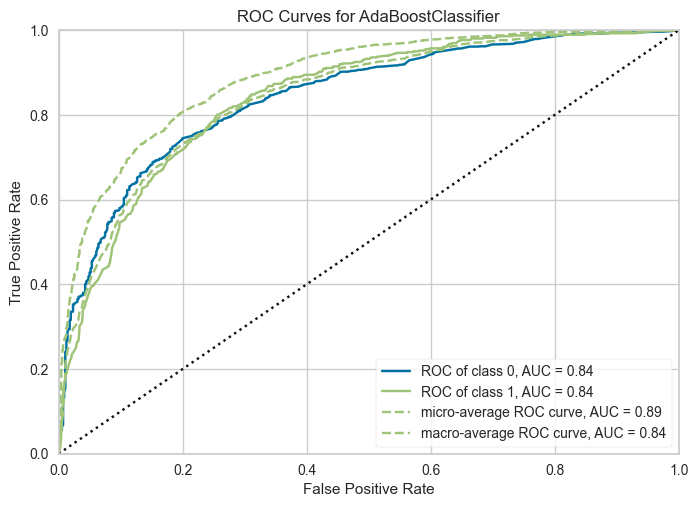

In [29]:
automl.plot_model(best_model)

The plot above represents the accuracy of churn rate prediction in this model. 0 represents no churn and has an accuracy of 0.84 in the mode. 1 represents yes churn and also has an accuracy of 0.84. If there was any data points below the 45 degree black dotted line, that would represent how often the model predicted a false positive rate.  

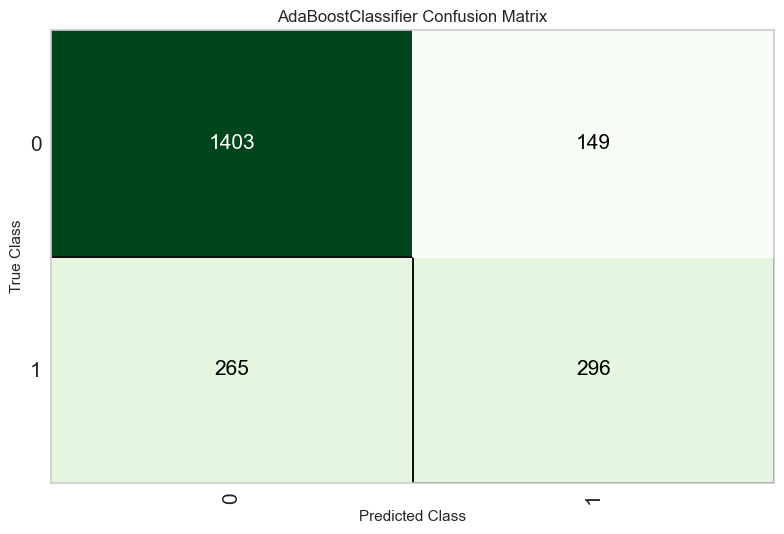

In [30]:
automl.plot_model(best_model, plot = 'confusion_matrix')

The confusion matrix represents different accuracies of the program. There was 265 predictions that was predicted no churn when churn was actually present. There was 296 yes churn predictions that was actually true. There was 149 yes churn predictions that was actually no churn. There was 1403 no churn predictons that were accurate. 

In [31]:
df.iloc[-2:-1].shape

(1, 7)

In [32]:
df.iloc[-2].shape

(7,)

In [33]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5003


In [13]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8117,0.8449,0.8117,0.8023,0.8032,0.4788,0.4858


In [14]:
predictions.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,No,No,0.6
1,5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,No,No,0.8
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,Yes,Yes,0.6
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,No,No,1.0
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,Yes,No,0.6


In [34]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                     include=['Contract', 'PaymentMethod'],
                                     transformer=OneHotEncoder(cols=['Contract',
                                                       

In [35]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [36]:
new_data = df.iloc[-2:-1]

In [37]:
new_pycaret.predict_model(loaded_model, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5003


# Making a Python module to make predictions

In [19]:
import os

# File name
file_name = 'churn_data.csv'

# Check if the file exists in the current working directory
file_exists = os.path.exists(file_name)

if file_exists:
    print(f"The file '{file_name}' exists in the current working directory.")
else:
    print(f"The file '{file_name}' does not exist in the current working directory.")


The file 'churn_data.csv' exists in the current working directory.


In [38]:
from IPython.display import Code

Code('predict_Churn.py')

import pandas as pd 
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    df = pd.read_csv(filepath, index_col='customerID')
    return df

def make_predictions(df):
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    return predictions


if __name__ == "__main__" :
    df = load_data('churn_data.csv')
    predictions = make_predictions(df)
    print('predcitions:' )
    print(predictions)

In [39]:
%run predict_Churn.py

Transformation Pipeline and Model Successfully Loaded
predcitions:
            tenure PhoneService        Contract              PaymentMethod  \
customerID                                                                   
7590-VHVEG       1           No  Month-to-month           Electronic check   
5575-GNVDE      34          Yes        One year               Mailed check   
3668-QPYBK       2          Yes  Month-to-month               Mailed check   
7795-CFOCW      45           No        One year  Bank transfer (automatic)   
9237-HQITU       2          Yes  Month-to-month           Electronic check   
...            ...          ...             ...                        ...   
6840-RESVB      24          Yes        One year               Mailed check   
2234-XADUH      72          Yes        One year    Credit card (automatic)   
4801-JZAZL      11           No  Month-to-month           Electronic check   
8361-LTMKD       4          Yes  Month-to-month               Mailed check 

<Figure size 800x550 with 0 Axes>

# Summary

I started off by importing the non prepped data from week two. I then created a virtual enviorment where I created a pycaret conda enviorment. I then figured out that the best model was the Adaboost classifier. I then evualuted the classifier and looked at feature importance. The most used features for the program to determine churn risk was TotalCharges at the top with variable importance a little above 0.35. After that was tenure with variable importance of 0.30. I then evualted the plot for the Adaboost classifier and confusion matrix. I then saved the pycaret model. I eventually went and created a python file and ran the pycaret model there. I then imported this back into my notebook and was able to run it in the notebook. 